In [2]:
%store -r econ_x

In [20]:
%store -r econ_x_raw

In [46]:
tech_data = pd.read_csv("tech_raw_data_ret.csv")
tech_data.index = pd.DatetimeIndex(tech_data.iloc[:,[0]].values.flatten())
tech_data = tech_data.iloc[:,1:]

In [78]:
tech_data.columns

Index([u'benchmark', u'GDP', u'CSUSHPINSA', u'DGS10', u'TEDRATE', u'FEDFUNDS',
       u'PCE', u'UNRATE', u'RECPROUSM156N', u'VIXCLS', u'XOI.Index',
       u'YIELD_SLOPE', u'XAU.Curncy', u'CSENT', u'PAYEMS', u'OAS', u'SP500',
       u'TELECOMEXPORT', u'PPI_TELECOM', u'PPI_SOFTWARE',
       u'PPI_Semiconductor'],
      dtype='object')

In [81]:
common_data_column = list(set(list(tech_data.columns)).intersection(set(list(econ_x_raw.columns))))
common_data_column

['GDP',
 'DGS10',
 'TEDRATE',
 u'YIELD_SLOPE',
 'PAYEMS',
 'VIXCLS',
 'CSUSHPINSA',
 'RECPROUSM156N',
 'UNRATE',
 'FEDFUNDS',
 'PCE']

In [85]:
fin_specific_columns = np.setdiff1d(list(econ_x_raw.columns),common_data_column)

In [83]:
common_data = tech_data.loc[:,common_data_column]

In [96]:
fin_specific = econ_x_raw.loc[:,fin_specific_columns]
fin_specific.head()

,BAMLH0A0HYM2,NETEXP,UMCSENT,XAU Curncy,XOI Index
1999-01-31,0.0560,-208.515,103.9,286.15,394.97
1999-02-28,0.0521,-208.515,108.1,287.05,384.96
1999-03-31,0.0519,-208.515,105.7,280.05,450.59
1999-04-30,0.0476,-245.428,104.6,286.55,515.08
1999-05-31,0.0475,-245.428,106.8,270.35,505.39


In [95]:
# ((spx_ind.shift(-1)/spx_ind) -1)
(-245.428+208.515)/(-208.515)

0.1770280315564828

In [93]:
fin_specific.iloc[:,[0]] = fin_specific.iloc[:,[0]]/100
fin_specific.iloc[:,[1]] = ( fin_specific.iloc[::3,[1]].shift(-1)/  fin_specific.iloc[::3,[1]] -1).shift(-1)

In [98]:
 fin_specific.iloc[::3,[1]]

,NETEXP
1999-01-31,-208.515
1999-04-30,-245.428
1999-07-31,-276.106
1999-10-31,-296.475
2000-01-31,-352.760
2000-04-30,-359.587
2000-07-31,-388.487
2000-10-31,-402.351
2001-01-31,-391.688
2001-04-30,-359.331


In [99]:
(-245.428-(-208.515))/(-208.515)

0.1770280315564828

In [48]:
tech_y = tech_data.iloc[:,[0]]
tech_x = tech_data.iloc[:,1:]

In [3]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [5]:
%run -i financial_sector_functions.py

/home/luke/anaconda2/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
%run -i financial_sector_ret_space.py

In [14]:
econ_x,sector_ind_ret = model_data(econ_x,sector_ind_ret)

In [53]:
x= tech_x
y= tech_y
linear = sm.OLS(y, x)
results = linear.fit()

y_predict = pd.DataFrame(results.predict(x),index = x.index)
metric_value = evaluate_metric(y,y_predict,'r2')
print(metric_value)

0.786547164603


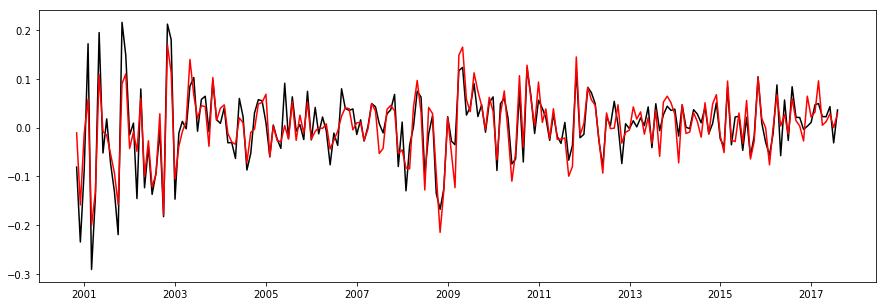

In [57]:
plt.figure(figsize = (15,5))
plt.plot(y,'k-')
plt.plot(y_predict,'r-')
plt.show()